In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer

In [2]:
# read test data and training data
train_data = pandas.read_csv("all/train.csv")
test_data = pandas.read_csv("all/test.csv")

In [3]:
# Get a big idea of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train_data.drop('Id',axis=1,inplace=True)

In [5]:
# check non integer value column
stringData = train_data.select_dtypes(include='object')

stringData.info()
stringData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [6]:
# check the missing data rate
all_data_na = (train_data.isnull().sum() / len(train_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pandas.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


## According to data description， We created a map to change string to integer vaule

In [7]:
keys = list(stringData)
values = []
for key in keys:
    train_data[key] = train_data[key].fillna("None")
    values = values + train_data[key].unique().tolist()
distincted = set(values)

i = 0
filterMap = {}
for item in distincted:
    filterMap[item] = i
    i += 1
print(filterMap)
train_data = train_data.applymap(lambda s:filterMap.get(s) if s in filterMap else s)

{'Corner': 0, 'CollgCr': 1, 'NridgHt': 2, 'ConLw': 3, 'C (all)': 4, 'BrkCmn': 5, 'Typ': 6, 'BLQ': 7, 'AllPub': 8, 'RRNn': 9, 'Min1': 10, 'RH': 11, 'Slab': 12, 'Family': 13, 'Gtl': 14, 'Metal': 15, 'Po': 16, 'Wood': 17, 'Crawfor': 18, 'Blmngtn': 19, 'RRAe': 20, 'Membran': 21, 'NWAmes': 22, 'GdPrv': 23, 'Flat': 24, 'Feedr': 25, '1Story': 26, 'CBlock': 27, 'SFoyer': 28, 'MeadowV': 29, 'Low': 30, 'Wd Shng': 31, 'CmentBd': 32, 'TwnhsE': 33, 'FR2': 34, 'Gambrel': 35, 'Ex': 36, 'Mn': 37, 'AsbShng': 38, '2.5Fin': 39, 'SBrkr': 40, 'Othr': 41, '2fmCon': 42, 'Lvl': 43, 'NoRidge': 44, 'TenC': 45, 'Detchd': 46, 'OthW': 47, 'CarPort': 48, 'Con': 49, 'Stucco': 50, 'Twnhs': 51, 'ConLD': 52, 'RRNe': 53, 'WdShake': 54, 'Av': 55, 'SWISU': 56, 'Oth': 57, 'Artery': 58, 'Somerst': 59, 'Other': 60, 'RM': 61, 'Basment': 62, 'VinylSd': 63, 'Tar&Grv': 64, 'Plywood': 65, 'BrkSide': 66, 'CWD': 67, 'Gable': 68, 'WdShing': 69, 'ImStucc': 70, 'Maj1': 71, 'Sev': 72, 'Mix': 73, 'Maj2': 74, 'TA': 75, 'Mitchel': 76, 'No

In [8]:
lsitOfMissingValues = train_data.columns[train_data.isnull().any()].tolist()
lsitOfMissingValues

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [25]:
LotFrontage_mean = train_data.LotFrontage.mean()
train_data.LotFrontage.fillna(LotFrontage_mean,inplace=True)


In [29]:
np.isnan(train_data.GarageYrBlt.values).sum()

81

In [30]:
train_data.GarageType.value_counts()

92     870
46     387
113     88
138     81
62      19
48       9
165      6
Name: GarageType, dtype: int64

In [28]:
train_data.MasVnrArea.fillna(0,inplace=True)

In [31]:
train_data.GarageYrBlt.fillna(0,inplace=True)

In [23]:
mean_imputer = Imputer(missing_values='NaN',strategy='mean')
mean_imputer = mean_imputer.fit(train_data)
imputed = mean_imputer.transform(train_data)
imputed

array([[6.00000e+01, 1.53000e+02, 6.50000e+01, ..., 1.60000e+02,
        7.70000e+01, 2.08500e+05],
       [2.00000e+01, 1.53000e+02, 8.00000e+01, ..., 1.60000e+02,
        7.70000e+01, 1.81500e+05],
       [6.00000e+01, 1.53000e+02, 6.80000e+01, ..., 1.60000e+02,
        7.70000e+01, 2.23500e+05],
       ...,
       [7.00000e+01, 1.53000e+02, 6.60000e+01, ..., 1.60000e+02,
        7.70000e+01, 2.66500e+05],
       [2.00000e+01, 1.53000e+02, 6.80000e+01, ..., 1.60000e+02,
        7.70000e+01, 1.42125e+05],
       [2.00000e+01, 1.53000e+02, 7.50000e+01, ..., 1.60000e+02,
        7.70000e+01, 1.47500e+05]])

#### MSZoning

In [145]:
MSZoningMap = {
    'A' : 1,
    'C' : 2,
    'FV' : 3,
    'I' : 4,
    'RH' : 5,
    'RL' : 6,
    'RP' : 7,
    'RM' : 8
}

In [146]:
train_data = train_data.applymap(lambda s:MSZoningMap.get(s) if s in MSZoningMap else s)

#### Alley, Street

In [147]:
AlleyStreetMap = {
    'Grvl' : 1,
    'Pave' : 2,
    '0' : 0
}

In [148]:
train_data["Alley"] = train_data['Alley'].fillna('0')
train_data = train_data.applymap(lambda s:AlleyStreetMap.get(s) if s in AlleyStreetMap else s)

#### LotShape

In [149]:
LotShapeMap = {
    'Reg' : 1,
    'IR1' : 2,
    'IR2' : 3,
    'IR3' :4
}

In [150]:
train_data = train_data.applymap(lambda s:LotShapeMap.get(s) if s in LotShapeMap else s)

In [151]:
LandContourMap={
    'Lvl' : 1,
    'Bnk' : 2,
    'HLS' : 3,
    'Low' : 4
}

In [152]:
train_data = train_data.applymap(lambda s:LandContourMap.get(s) if s in LandContourMap else s)

#### Utilities

In [153]:
UtilitiesMap = {
    'AllPub' : 1,
    'NoSewr' : 2,
    'NoSeWa' : 3,
    'ELO' :4
}

In [154]:
train_data = train_data.applymap(lambda s:UtilitiesMap.get(s) if s in UtilitiesMap else s)

#### LotConfig

In [155]:
LotConfigMap = {
    'Inside' : 1,
    'Corner' : 2,
    'CulDSac' : 3,
    'FR2' : 4,
    'FR3' : 5
}
train_data = train_data.applymap(lambda s:LotConfigMap.get(s) if s in LotConfigMap else s)

#### LandSlope

In [156]:
LandSlopeMap = {
    'Gtl' : 1,
    'Mod' : 2,
    'Sev' : 3
}
train_data = train_data.applymap(lambda s:LandSlopeMap.get(s) if s in LandSlopeMap else s)

#### Neighborhood

In [157]:
Neighborhoodkeys =  train_data.Neighborhood.unique()
NeighborhoodMap = {}
i = 1
for key in Neighborhoodkeys:
    NeighborhoodMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:NeighborhoodMap.get(s) if s in NeighborhoodMap else s)

#### Condition

In [158]:
ConditionKeys =  train_data.Condition1.unique()
ConditionKeyMap = {}
i = 1
for key in ConditionKeys:
    ConditionKeyMap[key] = i
    i += 1
print(ConditionKeyMap)
train_data = train_data.applymap(lambda s:ConditionKeyMap.get(s) if s in ConditionKeyMap else s)

{'Norm': 1, 'Feedr': 2, 'PosN': 3, 'Artery': 4, 'RRAe': 5, 'RRNn': 6, 'RRAn': 7, 'PosA': 8, 'RRNe': 9}


In [159]:
BldgTypeKeys =  train_data.BldgType.unique()
BldgTypeMap = {}
i = 1
for key in BldgTypeKeys:
    BldgTypeMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:BldgTypeMap.get(s) if s in BldgTypeMap else s)

In [160]:
HouseStyleKeys =  train_data.HouseStyle.unique()
HouseStyleMap = {}
i = 1
for key in HouseStyleKeys:
    HouseStyleMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:HouseStyleMap.get(s) if s in HouseStyleMap else s)

In [161]:
RoofStyleKeys =  train_data.RoofStyle.unique()
RoofStyleMap = {}
i = 1
for key in RoofStyleKeys:
    RoofStyleMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:RoofStyleMap.get(s) if s in RoofStyleMap else s)
# Shed has same value in othter

In [162]:
RoofMatlKeys =  train_data.RoofMatl.unique()
RoofMatlMap = {}
i = 1
for key in RoofMatlKeys:
    RoofMatlMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:RoofMatlMap.get(s) if s in RoofMatlMap else s)

In [163]:
Exterior1stKeys =  train_data.Exterior1st.unique()
Exterior1stMap = {}
i = 1
for key in Exterior1stKeys:
    Exterior1stMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:Exterior1stMap.get(s) if s in Exterior1stMap else s)

In [164]:
MasVnrTypeKeys =  train_data.MasVnrType.unique()
MasVnrTypeMap = {}
i = 1
for key in MasVnrTypeKeys:
    MasVnrTypeMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:MasVnrTypeMap.get(s) if s in MasVnrTypeMap else s)

In [165]:
BsmtCondKeys =  train_data.BsmtCond.unique()
BsmtCondMap = {}
i = 1
for key in BsmtCondKeys:
    BsmtCondMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:BsmtCondMap.get(s) if s in BsmtCondMap else s)

In [166]:
FoundationKeys =  train_data.Foundation.unique()
FoundationMap = {}
i = 1
for key in FoundationKeys:
    FoundationMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:FoundationMap.get(s) if s in FoundationMap else s)

In [167]:
BsmtFinType1Keys =  train_data.BsmtFinType1.unique()
BsmtFinType1Map = {}
i = 1
for key in BsmtFinType1Keys:
    BsmtFinType1Map[key] = i
    i += 1
train_data = train_data.applymap(lambda s:BsmtFinType1Map.get(s) if s in BsmtFinType1Map else s)

In [168]:
HeatingKeys =  train_data.Heating.unique()
HeatingMap = {}
i = 1
for key in HeatingKeys:
    HeatingMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:HeatingMap.get(s) if s in HeatingMap else s)

In [176]:
ElectricalKeys =  train_data.Electrical.unique()
ElectricalMap = {}
i = 1
for key in ElectricalKeys:
    ElectricalMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:ElectricalMap.get(s) if s in ElectricalMap else s)

In [177]:
FunctionalKeys =  train_data.Functional.unique()
FunctionalMap = {}
i = 1
for key in FunctionalKeys:
    FunctionalMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:FunctionalMap.get(s) if s in FunctionalMap else s)

In [178]:
GarageTypeKeys =  train_data.GarageType.unique()
GarageTypeMap = {}
i = 1
for key in GarageTypeKeys:
    GarageTypeMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:GarageTypeMap.get(s) if s in GarageTypeMap else s)

In [179]:
GarageFinishKeys =  train_data.GarageFinish.unique()
GarageFinishMap = {}
i = 1
for key in GarageFinishKeys:
    GarageFinishMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:GarageFinishMap.get(s) if s in GarageFinishMap else s)

In [ ]:
PavedDriveKeys =  train_data.PavedDrive.unique()
PavedDriveMap = {}
i = 0
for key in GarageFinishKeys:
    GarageFinishMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:GarageFinishMap.get(s) if s in GarageFinishMap else s)

In [170]:
FenceKeys =  train_data.Fence.unique()
FenceMap = {}
i = 1
for key in FenceKeys:
    FenceMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:FenceMap.get(s) if s in FenceMap else s)

In [171]:
MiscFeatureKeys =  train_data.MiscFeature.unique()
MiscFeatureMap = {}
i = 1
for key in MiscFeatureKeys:
    MiscFeatureMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:MiscFeatureMap.get(s) if s in MiscFeatureMap else s)

In [172]:
SaleTypeKeys =  train_data.SaleType.unique()
SaleTypeMap = {}
i = 1
for key in SaleTypeKeys:
    SaleTypeMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:SaleTypeMap.get(s) if s in SaleTypeMap else s)

In [173]:
SaleConditionKeys =  train_data.SaleCondition.unique()
SaleConditionMap = {}
i = 1
for key in SaleConditionKeys:
    SaleConditionMap[key] = i
    i += 1
train_data = train_data.applymap(lambda s:SaleConditionMap.get(s) if s in SaleConditionMap else s)

In [174]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

## Visulization

In [244]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/home/jason/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


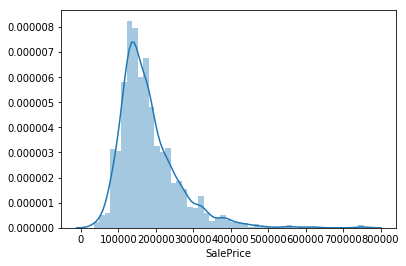

In [245]:
sns.distplot(train_data['SalePrice']);

<Figure size 432x288 with 0 Axes>

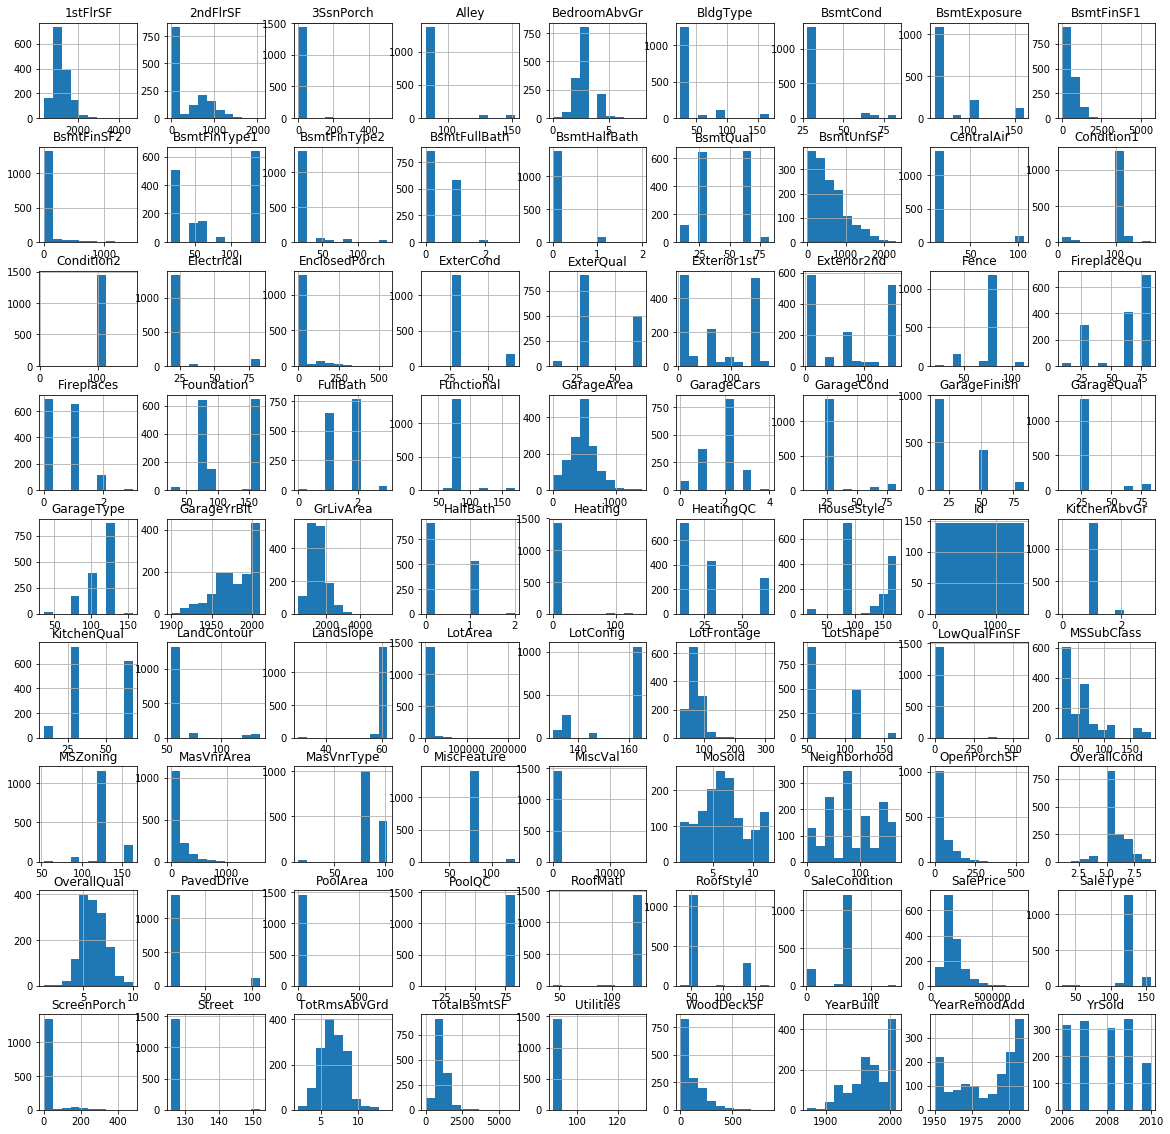

<Figure size 432x288 with 0 Axes>

In [246]:
train_data.hist(figsize=(20,20))
plt.figure()

<Figure size 432x288 with 0 Axes>

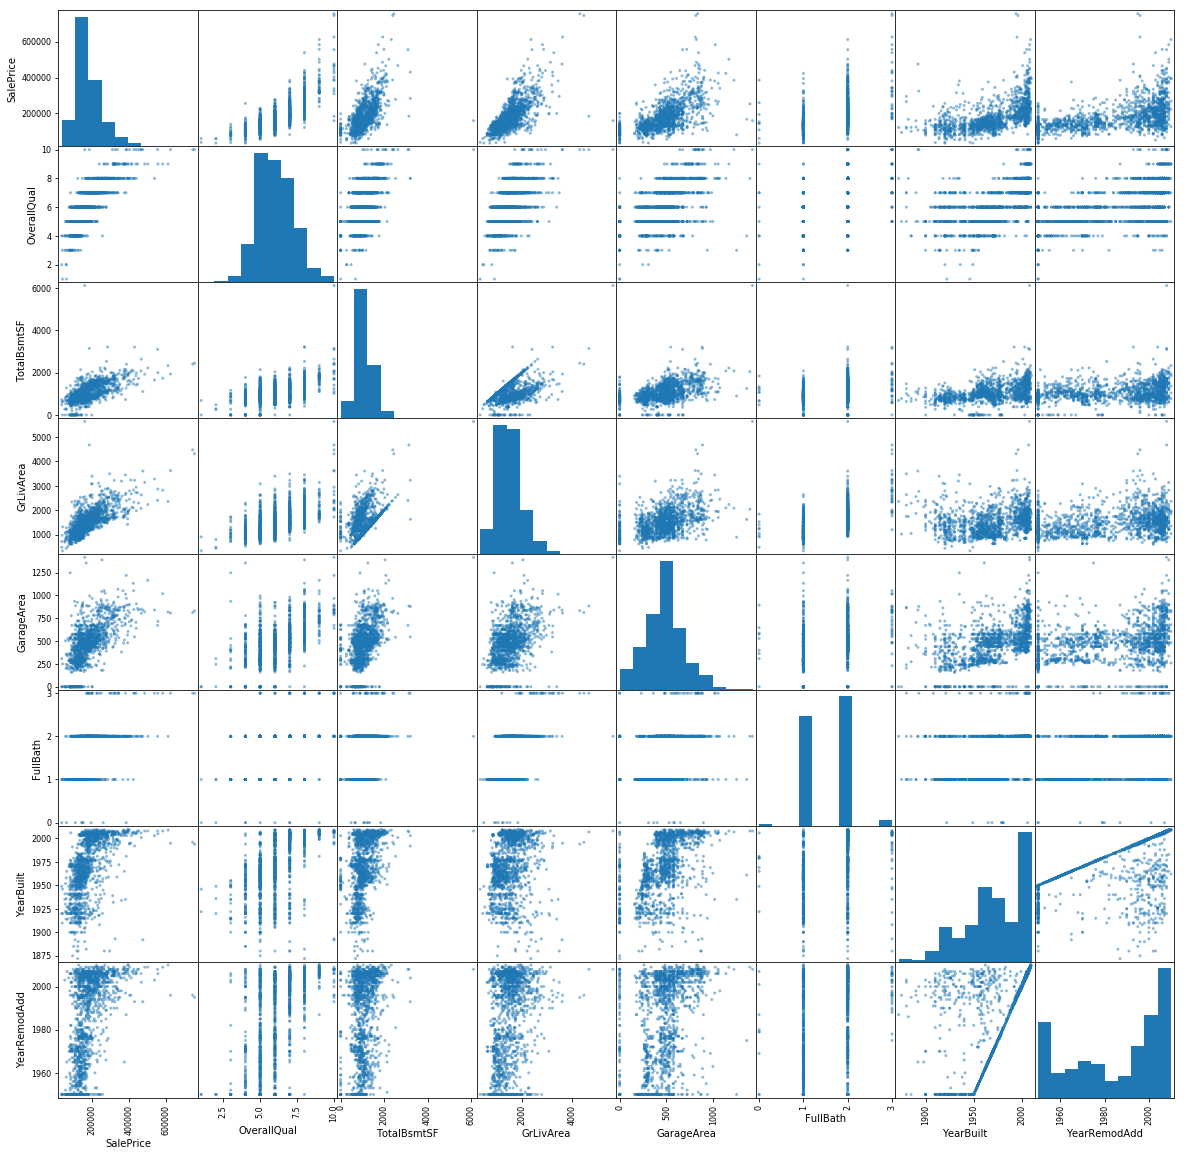

<Figure size 432x288 with 0 Axes>

In [247]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
pandas.plotting.scatter_matrix(train_data[columns],figsize=(20,20))
plt.figure()


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


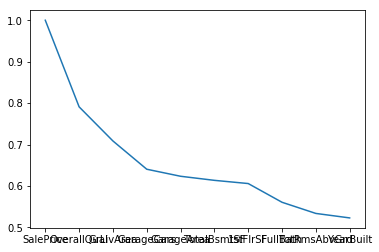

In [297]:
correlated = train_data.corr()
correlated = correlated.loc['SalePrice']
correlated = correlated.sort_values(ascending=False)

print(correlated.head(10))
plt.plot(correlated.head(10))

In [261]:
plt.figure(figsize=(7,4)) 
sns.heatmap(correlated,annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (80, 1) and (80,))

<Figure size 504x288 with 0 Axes>